In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("/kaggle/input/iisc-assignment/p1_movie_metadata.csv")

In [9]:
duplicates = data.duplicated() #this will give true for the duplicate rows and false for the remianing
duplicated_rows = data[duplicates] # select the rows wit True
# print(len(duplicated_rows))
df = data.drop_duplicates(keep="first")  # dropping the duplicates from ou data
df = df.dropna(subset=["director_name","title_year"])

In [11]:
df[df["director_name"]=="Adam McKay"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
294,Color,Adam McKay,265.0,116.0,285.0,107.0,Will Ferrell,12000.0,119219978.0,Action|Comedy|Crime,...,316.0,English,USA,PG-13,100000000.0,2010.0,8000.0,6.7,2.35,16000
571,Color,Adam McKay,164.0,122.0,285.0,989.0,Leslie Bibb,8000.0,148213377.0,Action|Comedy|Sport,...,437.0,English,USA,PG-13,73000000.0,2006.0,1000.0,6.6,2.35,0
660,Color,Adam McKay,173.0,106.0,285.0,105.0,Adam Scott,8000.0,100468793.0,Comedy,...,277.0,English,USA,R,65000000.0,2008.0,3000.0,6.9,2.35,0
934,Color,Adam McKay,272.0,143.0,285.0,7000.0,Will Ferrell,11000.0,2175312.0,Comedy,...,346.0,English,USA,PG-13,50000000.0,2013.0,8000.0,6.3,2.35,41000
1756,Color,Adam McKay,426.0,130.0,285.0,767.0,Christian Bale,33000.0,70235322.0,Biography|Comedy|Drama|History,...,374.0,English,USA,R,28000000.0,2015.0,23000.0,7.8,2.35,99000
1902,Color,Adam McKay,181.0,98.0,285.0,7000.0,Will Ferrell,640000.0,84136909.0,Comedy,...,577.0,English,USA,PG-13,26000000.0,2004.0,8000.0,7.2,1.85,0


In [12]:
df = df.sort_values(by=['director_name', 'title_year'])
df['next_title_year'] = df.groupby('director_name')['title_year'].shift(-1)
df['next_genres'] = df.groupby('director_name')['genres'].shift(-1)
df.dropna(inplace=True,axis=0)

In [13]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,next_title_year,next_genres
1902,Color,Adam McKay,181.0,98.0,285.0,7000.0,Will Ferrell,640000.0,84136909.0,Comedy,...,USA,PG-13,26000000.0,2004.0,8000.0,7.2,1.85,0,2006.0,Action|Comedy|Sport
571,Color,Adam McKay,164.0,122.0,285.0,989.0,Leslie Bibb,8000.0,148213377.0,Action|Comedy|Sport,...,USA,PG-13,73000000.0,2006.0,1000.0,6.6,2.35,0,2008.0,Comedy
660,Color,Adam McKay,173.0,106.0,285.0,105.0,Adam Scott,8000.0,100468793.0,Comedy,...,USA,R,65000000.0,2008.0,3000.0,6.9,2.35,0,2010.0,Action|Comedy|Crime
294,Color,Adam McKay,265.0,116.0,285.0,107.0,Will Ferrell,12000.0,119219978.0,Action|Comedy|Crime,...,USA,PG-13,100000000.0,2010.0,8000.0,6.7,2.35,16000,2013.0,Comedy
934,Color,Adam McKay,272.0,143.0,285.0,7000.0,Will Ferrell,11000.0,2175312.0,Comedy,...,USA,PG-13,50000000.0,2013.0,8000.0,6.3,2.35,41000,2015.0,Biography|Comedy|Drama|History


In [14]:
df= df.reset_index(drop=True)

In [15]:
df["num_gap_years"] = df["next_title_year"]-df["title_year"]

In [18]:
df["gross"]

0        84136909.0
1       148213377.0
2       100468793.0
3       119219978.0
4         2175312.0
           ...     
2194    210592590.0
2195    107503316.0
2196     55673333.0
2197     36381716.0
2198    291021565.0
Name: gross, Length: 2199, dtype: float64

In [16]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'next_title_year',
       'next_genres', 'num_gap_years'],
      dtype='object')

# plot between num_gap_year (derived column from the given dataset) vs gross

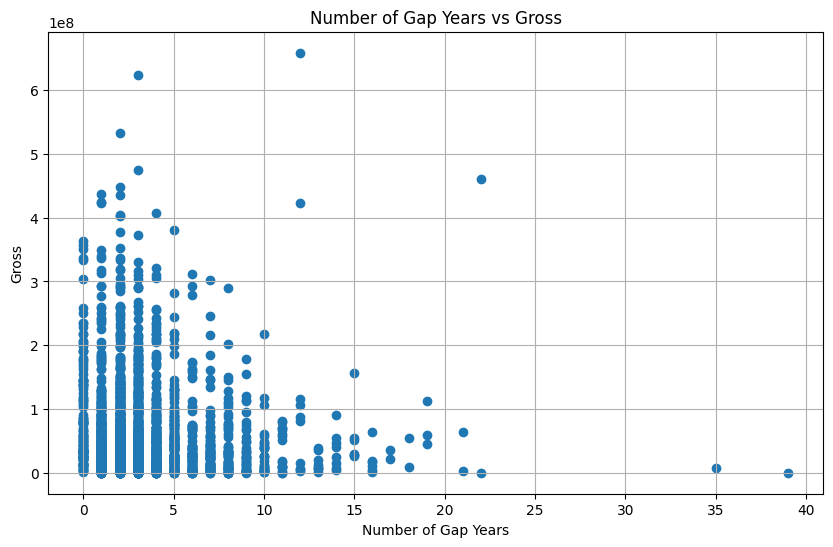

In [21]:
# Plotting num_gap_years vs gross
plt.figure(figsize=(10, 6))
plt.scatter(df['num_gap_years'], df['gross'], alpha=1)
plt.title('Number of Gap Years vs Gross')
plt.xlabel('Number of Gap Years')
plt.ylabel('Gross')
plt.grid(True)
plt.show()


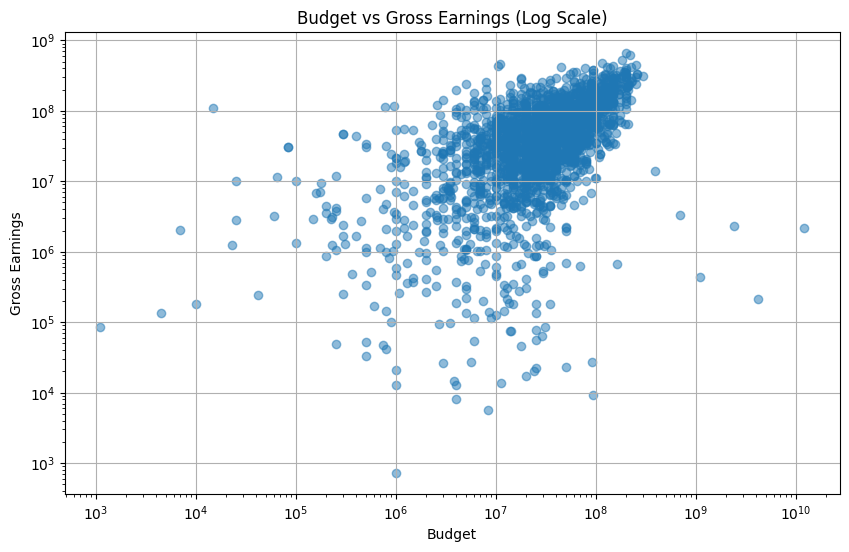

In [33]:
# Set figure size
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings (Log Scale)')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

plt.grid(True)
plt.show()


In [34]:
genre_counts = df['genres'].value_counts()

In [52]:
# df['genres'].unique()

In [36]:
# # Plotting genre distribution using a bar chart
# genre_counts.plot(kind='bar', figsize=(10, 6))
# plt.title('Genre Distribution')
# plt.xlabel('Genre')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45, ha='right')
# plt.show()

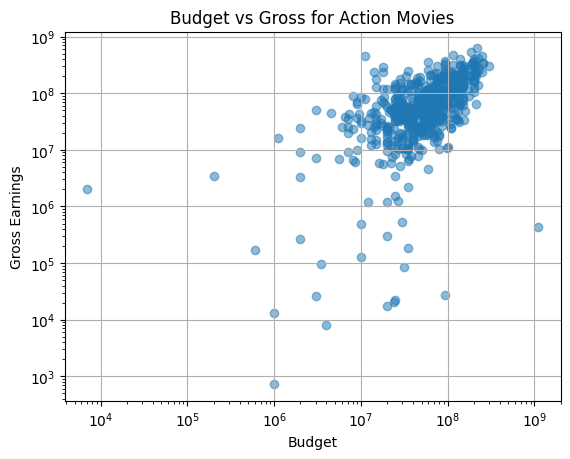

In [43]:
# Filter data for a specific genre (e.g., 'Action')
action_movies = df[df['genres'].str.contains('Action')]

# Example: Plotting budget vs gross for action movies
plt.scatter(action_movies['budget'], action_movies['gross'], alpha=0.5)
plt.title('Budget vs Gross for Action Movies')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xscale('log')
plt.yscale('log')

plt.grid(True)
plt.show()


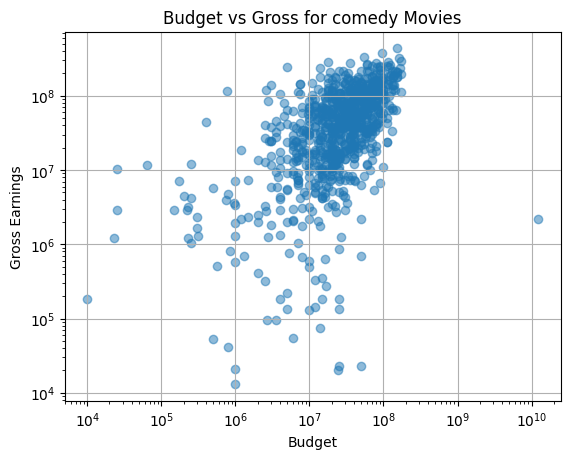

In [46]:
# Filter data for a specific genre (e.g., 'Action')
comedy_movies = df[df['genres'].str.contains('Comedy')]

# Example: Plotting budget vs gross for action movies
plt.scatter(comedy_movies['budget'], comedy_movies['gross'], alpha=0.5)
plt.title('Budget vs Gross for comedy Movies')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xscale('log')
plt.yscale('log')

plt.grid(True)
plt.show()


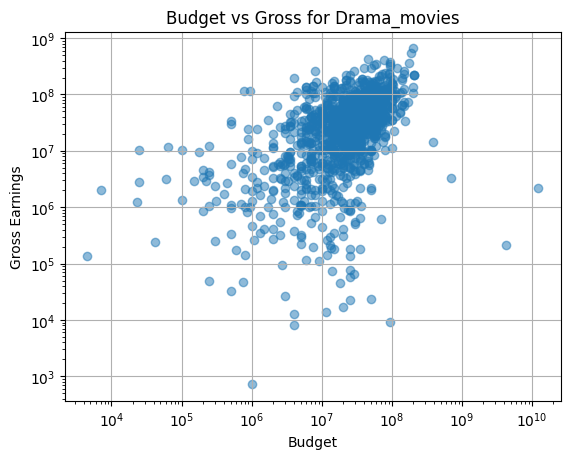

In [48]:
# Filter data for a specific genre (e.g., 'Action')
Drama_movies = df[df['genres'].str.contains('Drama')]

# Example: Plotting budget vs gross for action movies
plt.scatter(Drama_movies['budget'], Drama_movies['gross'], alpha=0.5)
plt.title('Budget vs Gross for Drama_movies')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xscale('log')
plt.yscale('log')

plt.grid(True)
plt.show()

# lets create a new column called profit which is the groos - budget


In [53]:
df["profit"] = df["gross"] - df["budget"]

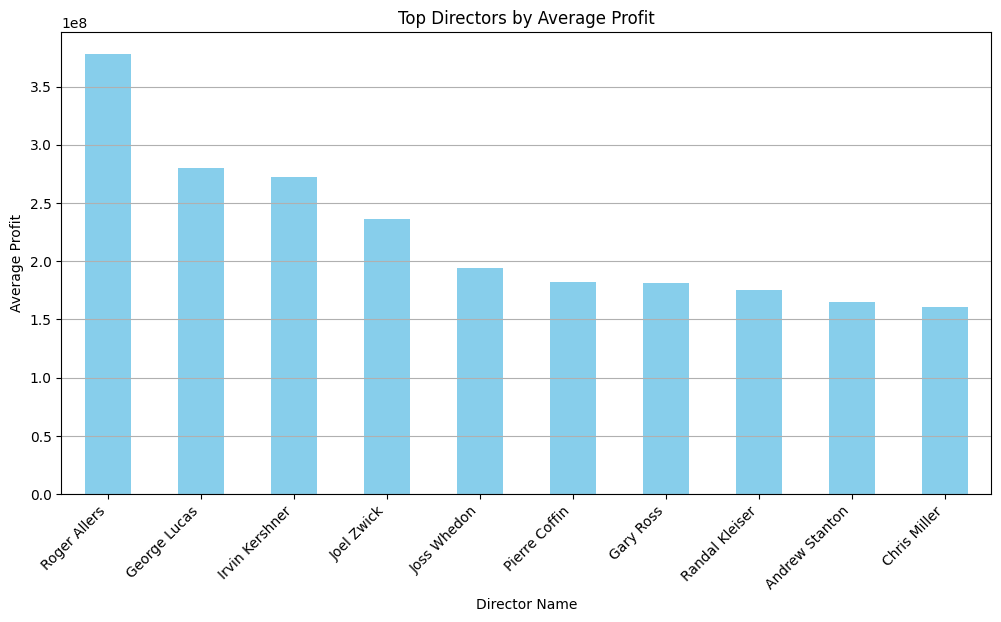

In [54]:
# Calculate average profit for each director
director_profit = df.groupby('director_name')['profit'].mean().sort_values(ascending=False)

# Select top N directors (e.g., top 10)
top_directors = director_profit.head(10)

# Plotting bar plot for average profit by director
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top Directors by Average Profit')
plt.xlabel('Director Name')
plt.ylabel('Average Profit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [56]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,next_title_year,next_genres,num_gap_years,profit
0,Color,Adam McKay,181.0,98.0,285.0,7000.0,Will Ferrell,640000.0,84136909.0,Comedy,...,26000000.0,2004.0,8000.0,7.2,1.85,0,2006.0,Action|Comedy|Sport,2.0,58136909.0
1,Color,Adam McKay,164.0,122.0,285.0,989.0,Leslie Bibb,8000.0,148213377.0,Action|Comedy|Sport,...,73000000.0,2006.0,1000.0,6.6,2.35,0,2008.0,Comedy,2.0,75213377.0
2,Color,Adam McKay,173.0,106.0,285.0,105.0,Adam Scott,8000.0,100468793.0,Comedy,...,65000000.0,2008.0,3000.0,6.9,2.35,0,2010.0,Action|Comedy|Crime,2.0,35468793.0
3,Color,Adam McKay,265.0,116.0,285.0,107.0,Will Ferrell,12000.0,119219978.0,Action|Comedy|Crime,...,100000000.0,2010.0,8000.0,6.7,2.35,16000,2013.0,Comedy,3.0,19219978.0
4,Color,Adam McKay,272.0,143.0,285.0,7000.0,Will Ferrell,11000.0,2175312.0,Comedy,...,50000000.0,2013.0,8000.0,6.3,2.35,41000,2015.0,Biography|Comedy|Drama|History,2.0,-47824688.0


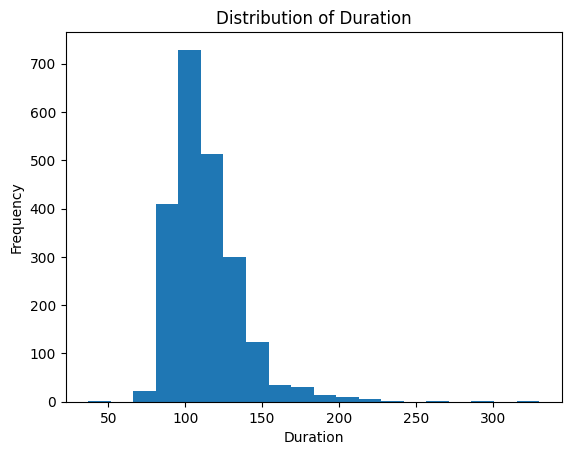

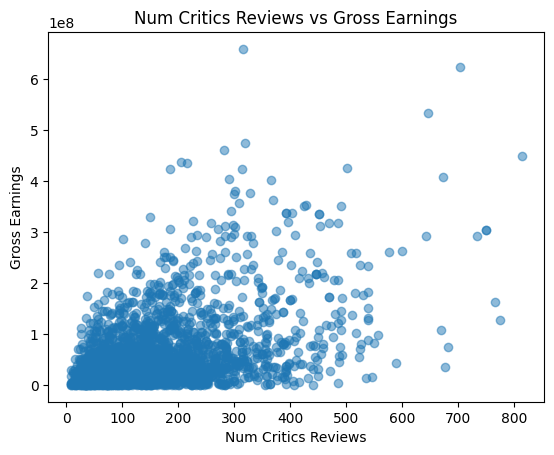

In [58]:
# Example: Histogram of 'duration'
plt.hist(df['duration'], bins=20)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()

# Example: Scatter plot of 'num_critic_for_reviews' vs 'gross'
plt.scatter(df['num_critic_for_reviews'], df['gross'], alpha=0.5)
plt.xlabel('Num Critics Reviews')
plt.ylabel('Gross Earnings')
plt.title('Num Critics Reviews vs Gross Earnings')
plt.show()



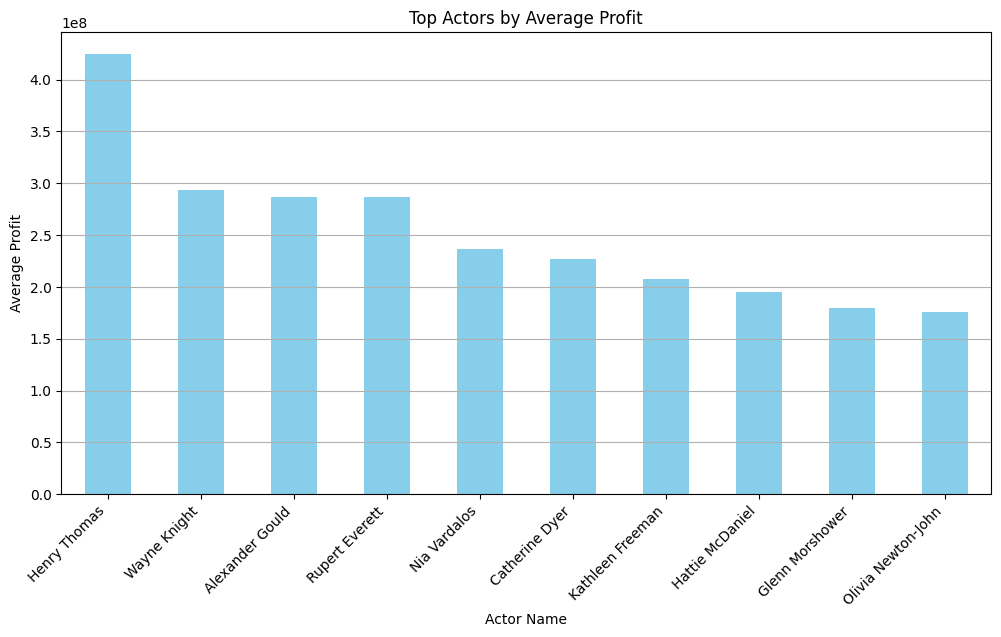

In [59]:
actor_avg_profit = df.groupby('actor_1_name')['profit'].mean().sort_values(ascending=False)
top_actors = actor_avg_profit.head(10)

# Plotting bar plot for average profit by actor
plt.figure(figsize=(12, 6))
top_actors.plot(kind='bar', color='skyblue')
plt.title('Top Actors by Average Profit')
plt.xlabel('Actor Name')
plt.ylabel('Average Profit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


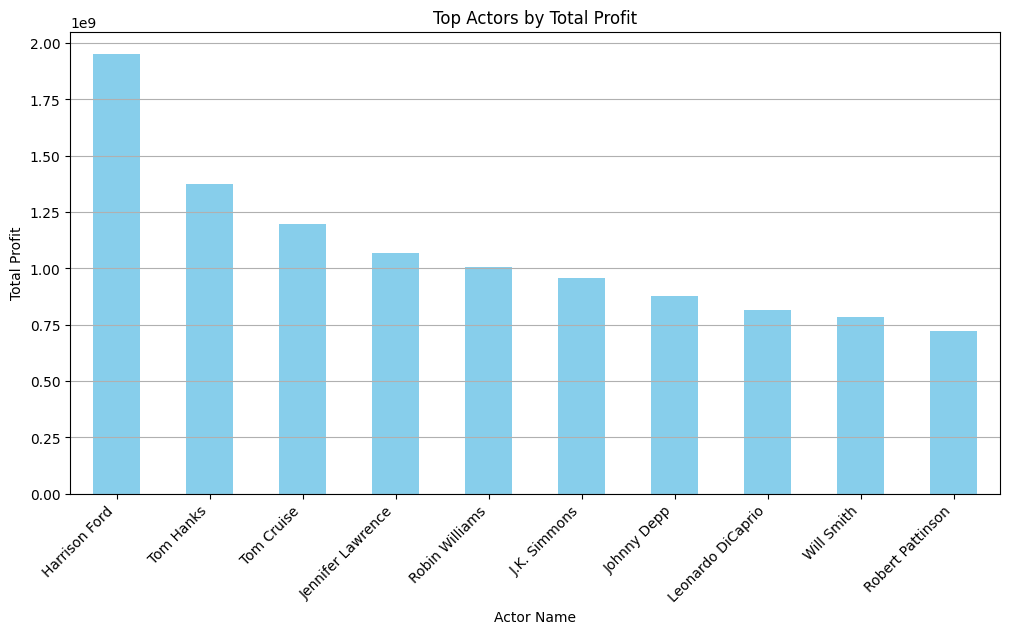

In [60]:
actor_total_profit = df.groupby('actor_1_name')['profit'].sum().sort_values(ascending=False)
top_actors = actor_total_profit.head(10)

# Plotting bar plot for total profit by actor
plt.figure(figsize=(12, 6))
top_actors.plot(kind='bar', color='skyblue')
plt.title('Top Actors by Total Profit')
plt.xlabel('Actor Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


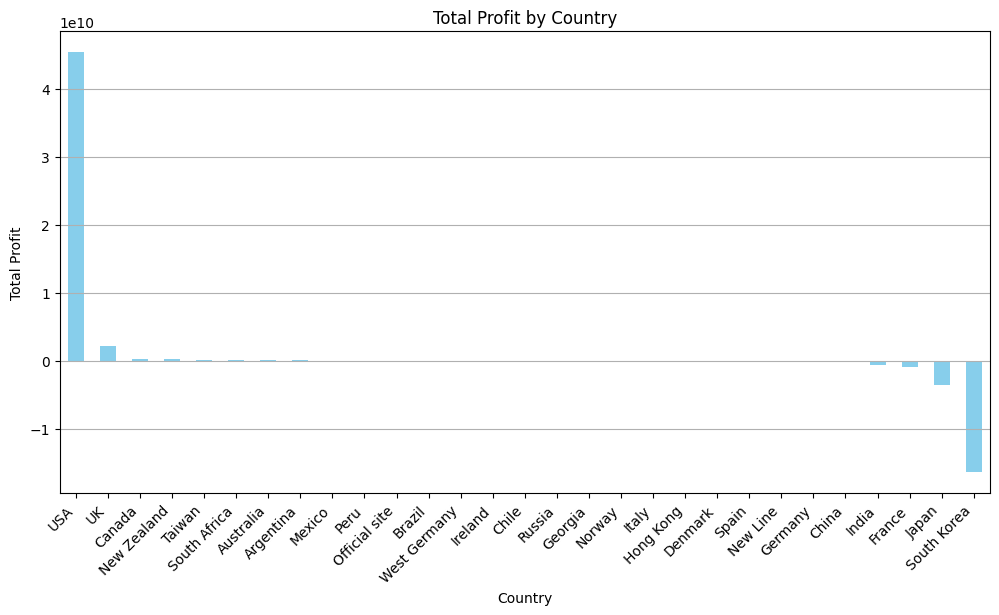

In [62]:

# Calculate total profit for each country
country_profit = df.groupby('country')['profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country_profit.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


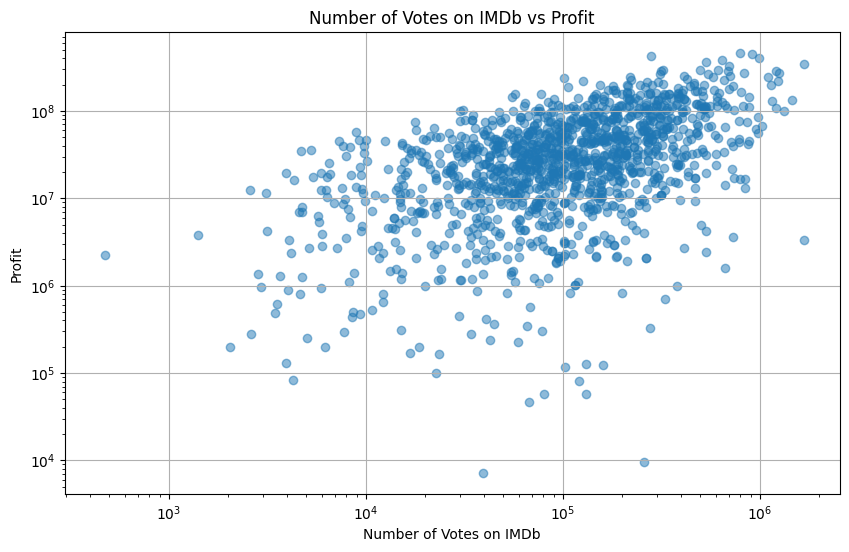

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(df['num_voted_users'], df['profit'], alpha=0.5)
plt.title('Number of Votes on IMDb vs Profit')
plt.xlabel('Number of Votes on IMDb')
plt.ylabel('Profit')
plt.xscale('log')
plt.yscale('log')

plt.grid(True)
plt.show()

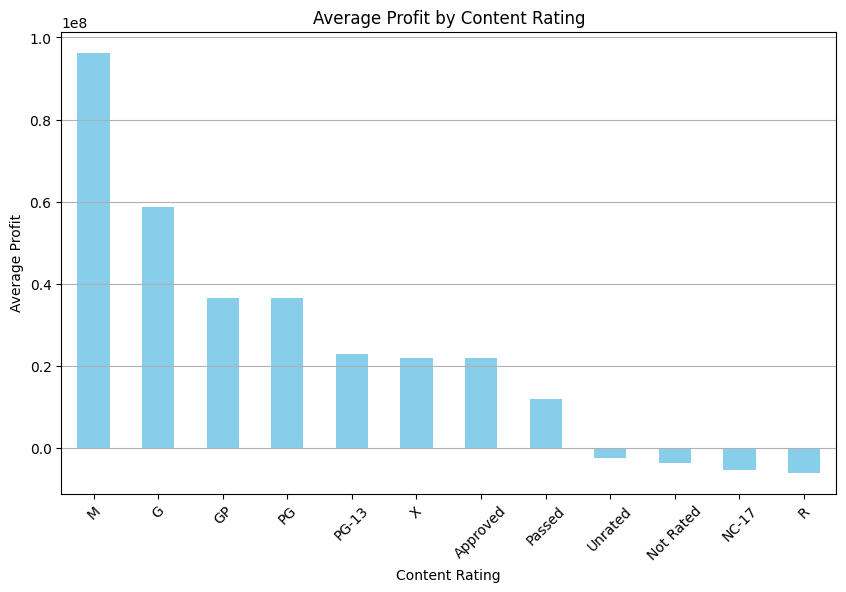

In [69]:
# Calculate average profit for each content rating
rating_avg_profit = df.groupby('content_rating')['profit'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
rating_avg_profit.plot(kind='bar', color='skyblue')
plt.title('Average Profit by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

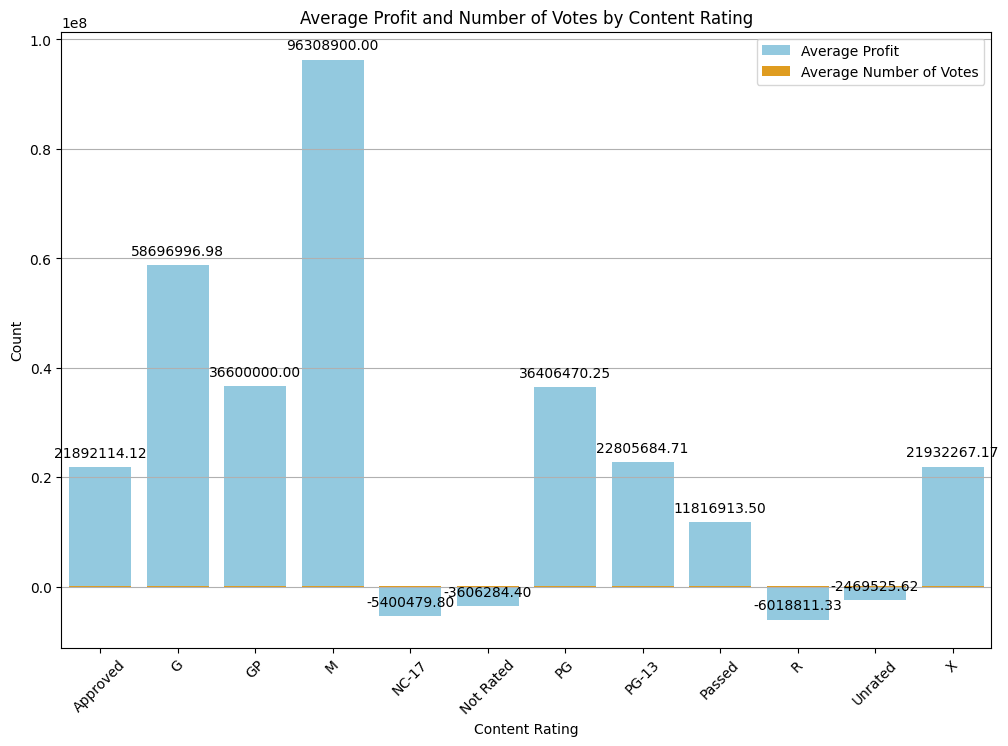

In [73]:

rating_stats = df.groupby('content_rating').agg({'profit': 'mean', 'num_voted_users': 'mean'}).reset_index()
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=rating_stats, x='content_rating', y='profit', color='skyblue', label='Average Profit')

# Annotate the bars with number of votes
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

sns.barplot(data=rating_stats, x='content_rating', y='num_voted_users', color='orange', label='Average Number of Votes')

plt.title('Average Profit and Number of Votes by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()